Initial Centroids:
 [[10.   2. ]
 [ 1.5  1.8]
 [ 9.  11. ]]

Iteration 1 Centroids:
 [[1.16666667 1.46666667]
 [7.33333333 9.        ]
 [9.         2.33333333]]

Iteration 2 Centroids:
 [[1.16666667 1.46666667]
 [7.33333333 9.        ]
 [9.         2.33333333]]

Iteration 3 Centroids:
 [[1.16666667 1.46666667]
 [7.33333333 9.        ]
 [9.         2.33333333]]

Iteration 4 Centroids:
 [[1.16666667 1.46666667]
 [7.33333333 9.        ]
 [9.         2.33333333]]

Iteration 5 Centroids:
 [[1.16666667 1.46666667]
 [7.33333333 9.        ]
 [9.         2.33333333]]


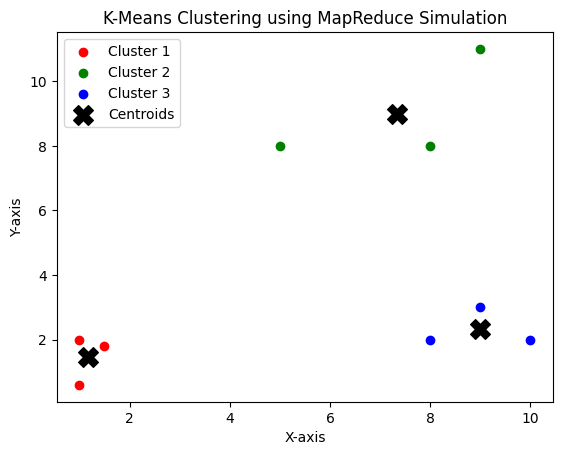

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# ---------- STEP 1: INPUT DATA ----------
# You can replace this with your dataset (x, y)
data = np.array([
    [1.0, 2.0],
    [1.5, 1.8],
    [5.0, 8.0],
    [8.0, 8.0],
    [1.0, 0.6],
    [9.0, 11.0],
    [8.0, 2.0],
    [10.0, 2.0],
    [9.0, 3.0]
])

# ---------- STEP 2: PARAMETERS ----------
k = 3  # number of clusters
num_iterations = 5

# Initialize centroids randomly from data points
np.random.seed(42)
centroids = data[np.random.choice(range(len(data)), k, replace=False)]

print("Initial Centroids:\n", centroids)

# ---------- STEP 3: MAPREDUCE ITERATIONS ----------
for i in range(num_iterations):
    # --- MAPPER PHASE ---
    # Assign each point to nearest centroid
    mapper_output = defaultdict(list)
    for point in data:
        distances = np.linalg.norm(point - centroids, axis=1)
        cluster_id = np.argmin(distances)
        mapper_output[cluster_id].append(point)

    # --- REDUCER PHASE ---
    # Recalculate centroids (mean of each cluster)
    new_centroids = []
    for cluster_id, points in mapper_output.items():
        new_centroids.append(np.mean(points, axis=0))
    centroids = np.array(new_centroids)

    print(f"\nIteration {i+1} Centroids:\n", centroids)

# ---------- STEP 4: FINAL CLUSTER ASSIGNMENTS ----------
labels = []
for point in data:
    distances = np.linalg.norm(point - centroids, axis=1)
    labels.append(np.argmin(distances))
labels = np.array(labels)

# ---------- STEP 5: VISUALIZATION ----------
colors = ['red', 'green', 'blue']
for i in range(k):
    cluster_points = data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering using MapReduce Simulation')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()
